In [1]:
from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
''')

In [2]:
# We understand that we should keep a copy of original data while cleaning, 
# but for a clear view, we only keep final version of cleaned data

## Data Cleaning

In [3]:
# CLEANING PROCESS
# all data are limited to 
#       year 2019: pre-covid
#       year 2020: covid
#       year 2021: post-covid
# data format is kept in monthly order
# we always keep 2 columns 'Month' and 'Year'

In [4]:
# AFTER CLEANING
# each final dataset is convert to 36 rows (not including headers), 
# from 2019 to 2021 with strictly 12 months per year.

In [3]:
import pandas as pd
import numpy as np
import calendar

international_student = pd.read_csv("instu_R1.csv")
transport_usage = pd.read_csv("transport_R2.csv")
employment = pd.read_csv("employment_R3.csv")
passenger = pd.read_csv("passenger_R4.csv")

### Data 1 : Enrolment of international students

In [6]:
# Monthly international students' enrolments & commencements

In [2]:
# Replace headers with first row
new_header = international_student.iloc[0]
international_student = international_student[1:]
international_student.columns = new_header
# Rename headers
international_student.columns = ['Year','Month','State','Higher Education Enrolments','VET Enrolments',
                                'Schools Enrolments','ELICOS Enrolments','Non-award Enrolments',
                                'Higher Education Commencements','VET Commencements','Schools Commencements',
                                'ELICOS Commencements','Non-award Commencements']
# Clear all year execept for Jan 19 to Dec 21
international_student = international_student[(international_student["Year"] == "2021") | (international_student["Year"] == '2020') | (international_student["Year"] == '2019')]
# Clear all states except "NSW"
international_student = international_student[(international_student["State"] == "NSW")]

In [3]:
international_student.head(3)

,Year,Month,State,Higher Education Enrolments,VET Enrolments,Schools Enrolments,ELICOS Enrolments,Non-award Enrolments,Higher Education Commencements,VET Commencements,Schools Commencements,ELICOS Commencements,Non-award Commencements
1,2019,Jan,NSW,"98,257","59,377","4,596","19,714","7,580","1,762","8,893","1,896","4,653","1,485"
10,2019,Feb,NSW,"120,224","66,453","4,690","23,231","11,711","23,729","15,969","1,990","8,170","5,616"
19,2019,Mar,NSW,"127,674","68,510","4,699","26,951","12,724","31,179","18,026","1,999","11,890","6,629"


### Data 2: Usage of public transport

In [9]:
# Monthly trips counts

In [10]:
# Restructure data
transport_usage = transport_usage.pivot_table(index='Year_Month', columns='Travel_Mode', values='Trip', aggfunc='sum', margins=True)
# Delete last row ('total row')
transport_usage = transport_usage[:-1]
# Ensure all empty value are in the same format of nan
transport_usage = transport_usage.replace(' ', np.nan)
# 34 nan val exists

In [11]:
# Take 'Year_Month' column off 'Index'
transport_usage = transport_usage.rename_axis('Year_Month').reset_index()
# Split into 2 new columns: Year and Month
date = transport_usage['Year_Month'].str.split("-", expand=True,)
# Add new columns to data set
transport_usage = transport_usage.assign(Year=pd.DataFrame(date[0]))
transport_usage = transport_usage.assign(Month=pd.DataFrame(date[1]))
# Delete the old Year-Month column
transport_usage = transport_usage.drop('Year_Month', axis=1)
# Rearrange columns
transport_usage = transport_usage[["Year","Month","Bus","Ferry","Metro","Train","All"]]
# Clear all year execept for Jan 19 to Dec 21
transport_usage = transport_usage[(transport_usage["Year"] == "2021") | (transport_usage["Year"] == '2020') | (transport_usage["Year"] == '2019')]
# Convert int to month
transport_usage.Month = transport_usage['Month'].apply(lambda x: calendar.month_abbr[int(x)])

In [12]:
transport_usage.head(3)

Travel_Mode,Year,Month,Bus,Ferry,Metro,Train,All
30,2019,Jan,22040138.0,1619996.0,NaN,29925564.0,54210931.0
31,2019,Feb,25713814.0,1266715.0,NaN,32218764.0,60087643.0
32,2019,Mar,28742223.0,1300757.0,NaN,36530266.0,67583312.0


### Data 3: Employment

In [13]:
# Unemployment rate and hours worked

In [14]:
# Delete last 2 'info' rows
employment = employment[:-2]
# Split 'Date' into 2 columns contain 'Year' and 'Month'
date = employment['Date'].str.split("-", expand=True,)
# Add 'Year' "Month" to data set
employment = employment.assign(Year=pd.DataFrame(date[1]))
employment = employment.assign(Month=pd.DataFrame(date[0]))
# Remove old column 'Date'
employment = employment.drop('Date', axis=1)
# Rearrange column
# list(a) then copy the output
employment = employment[['Year','Month','Unemployment rate(%)','Underemployment rate(%)',
                        "Employed people ('000)",'Hours worked (m)','Hours worked Yearly change (%)',
                        'Underemployment Males (%)','Underemployment Females (%)']]
# Clear all year execept for Jan 19 to Dec 21
employment = employment[(employment["Year"] == "19") 
                        |(employment["Year"] == "20") 
                        | (employment["Year"] == "21")]
employment['Year'] = employment['Year'].replace(['19', '20', '21'], ['2019', '2020', '2021'])

In [15]:
employment.head(3)

,Year,Month,Unemployment rate(%),Underemployment rate(%),Employed people ('000),Hours worked (m),Hours worked Yearly change (%),Underemployment Males (%),Underemployment Females (%)
78,2019,Jan,5.1,8.1,"12,747.20","1,762",3.6,6.2,10.4
79,2019,Feb,5.0,8.1,"12,747.30","1,764",2.3,6.3,10.1
80,2019,Mar,5.1,8.3,"12,780.70","1,779",3.0,6.5,10.2


### Data 4: Passenger Air Movement

In [16]:
# Monthly passenger movement at 20 major Australian airports

In [17]:
# Clear all airports outside NSW
passenger = passenger[(passenger["AIRPORT"] == "SYDNEY")]
# Clear all year execept for Jan 19 to Dec 21
passenger = passenger[(passenger["Year"] == 2019) | (passenger["Year"] == 2020) | (passenger["Year"] == 2021)]
# Ensure all empty columns are in the same nan format
passenger = passenger.replace(' ', np.nan)
# Rearrange columns
passenger = passenger[['Year','Month','AIRPORT',
        'Dom_Pax_In','Dom_Pax_Out','Dom_Pax_Total',
        'Int_Pax_In','Int_Pax_Out','Int_Pax_Total',
        'Pax_In','Pax_Out','Pax_Total']]
passenger.Month = passenger['Month'].apply(lambda x: calendar.month_abbr[int(x)])

In [18]:
passenger.head(3)

,Year,Month,AIRPORT,Dom_Pax_In,Dom_Pax_Out,Dom_Pax_Total,Int_Pax_In,Int_Pax_Out,Int_Pax_Total,Pax_In,Pax_Out,Pax_Total
9084,2019,Jan,SYDNEY,1151296,1138031,2289327,887489,768912,1656401,2038785,1906943,3945728
9085,2019,Feb,SYDNEY,1041047,1041948,2082995,707952,612960,1320912,1748999,1654908,3403907
9086,2019,Mar,SYDNEY,1168035,1163665,2331700,656438,672111,1328549,1824473,1835776,3660249


In [19]:
# Export data frame to csv without index column
international_student.to_csv("instu_C1.csv", index = False)
transport_usage.to_csv("transport_C2.csv", index = False)
employment.to_csv("employment_C3.csv", index = False)
passenger.to_csv("passenger_C4.csv", index = False)

## Visualisation

In [ ]:
# I want to emphasize the change in 2020, when covid starts

In [27]:
from matplotlib import pyplot as plt

international_student = pd.read_csv("instu_C1.csv", thousands=',')
transport_usage = pd.read_csv("transport_C2.csv")
employment = pd.read_csv("employment_C3.csv", thousands=',')
passenger = pd.read_csv("passenger_C4.csv")

### D1: International Students

In [22]:
# Commencement of International Students from 2019 to 2021
# in Higher Education sector
is19 = international_student[international_student['Year']==2019]
is20 = international_student[international_student['Year']==2020]
is21 = international_student[international_student['Year']==2021]
x = is19['Month']
y19 = is19['Higher Education Commencements']
y20 = is20['Higher Education Commencements']
y21 = is21['Higher Education Commencements']

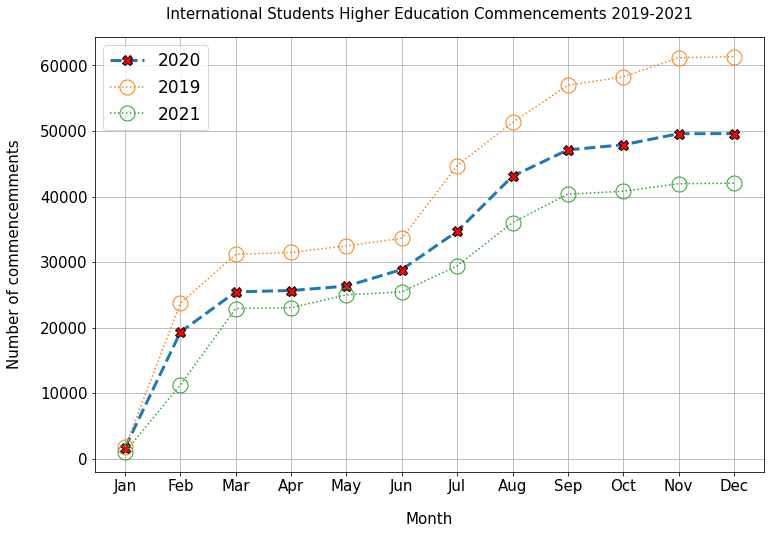

In [23]:
# Line graph (FIG 1.1)
plt.figure(figsize=(12,8))

plt.plot(x, y20, ls="--", lw=3, marker="X", markersize=10,
         markerfacecolor="red", markeredgecolor="black",label="2020")
plt.plot(x, y19, ls=":", marker="o", markersize=15,
         markerfacecolor="None", label="2019")
plt.plot(x, y21, ls=":", marker="o", markersize=15, 
         markerfacecolor="None", label="2021")

plt.title('International Students Higher Education Commencements 2019-2021'
          , fontsize=15, pad=18)
plt.grid()
plt.xlabel('Month', fontsize=15, labelpad=18)
plt.ylabel('Number of commencemments', fontsize=15, labelpad=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=17)
plt.show()
# plt.savefig('line.png')

In [24]:
# Total Enrolments and Commencements of International Students
# Each year from 2019 to 2021
x19 = pd.melt(is19,id_vars=['Year','Month','State'])['value']
is21 = pd.melt(is21,id_vars=['Year','Month','State'])['value']

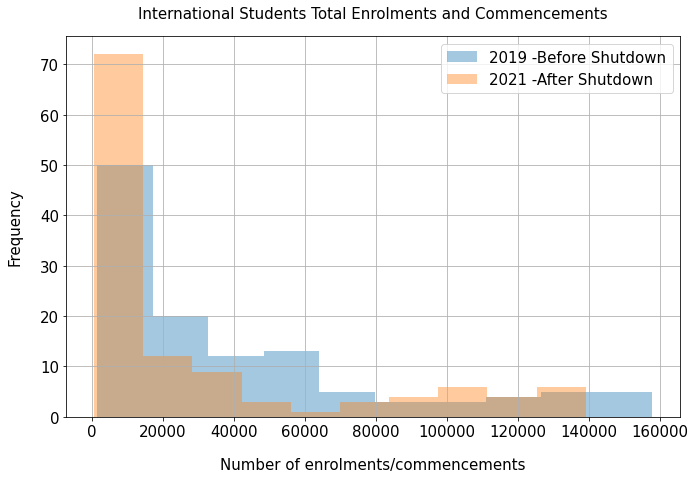

In [25]:
# Histogram (FIG 1.2)
plt.figure(figsize=(11,7))
plt.hist(x19, alpha=0.4, label='2019 -Before Shutdown')
plt.hist(x21, alpha=0.4, label='2021 -After Shutdown')

plt.title('International Students Total Enrolments and Commencements'
          ,fontsize=15, pad=18)
plt.grid()
plt.xlabel('Number of enrolments/commencements', fontsize=15, labelpad=18)
plt.ylabel('Frequency', fontsize=15, labelpad=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()
# plt.savefig('hist.png')

### D2: Public transport usage

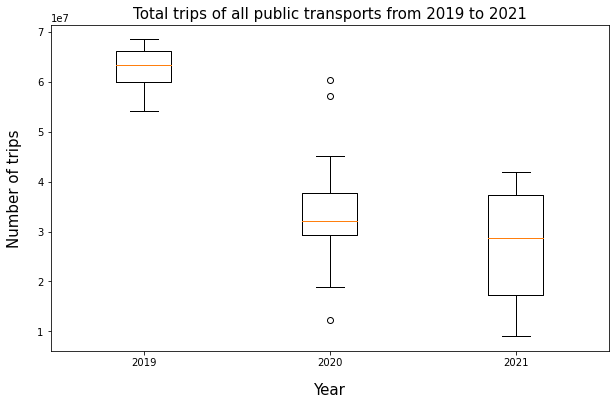

In [33]:
# Total trips of all public transports from 2019 to 2021
# Boxplot (FIG 2.1)
tp19 = transport_usage[transport_usage['Year']==2019]['All']
tp20 = transport_usage[transport_usage['Year']==2020]['All']
tp21 = transport_usage[transport_usage['Year']==2021]['All']

plt.figure(figsize=(10,6))
plt.title('Total trips of all public transports from 2019 to 2021', fontsize=15)
plt.boxplot([tp19, tp20, tp21], labels = ['2019', '2020', '2021'])
plt.xlabel("Year", fontsize=15, labelpad=15)
plt.ylabel("Number of trips", fontsize=15, labelpad=15)
plt.show()

### D3: Employment

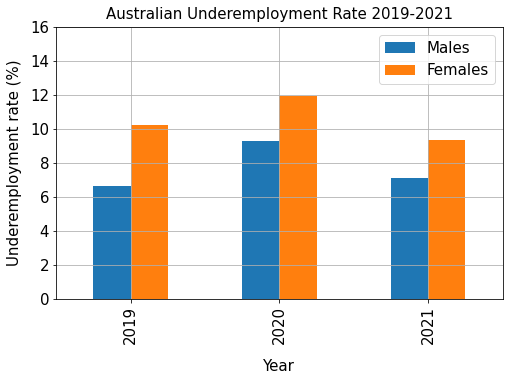

In [37]:
# Bar chart (FIG 3.1)
employment = employment.groupby('Year').mean()
employment = employment.rename_axis('Year').reset_index()

employment.plot.bar(x='Year', y=['Underemployment Males (%)', 'Underemployment Females (%)'], 
             label=['Males', 'Females'], figsize = (8, 5))
plt.title('Australian Underemployment Rate 2019-2021', fontsize=15, pad=8)
plt.grid()
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('Underemployment rate (%)', fontsize=15, labelpad=8)
plt.ylim(0, 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

### D4: Passenger air movement

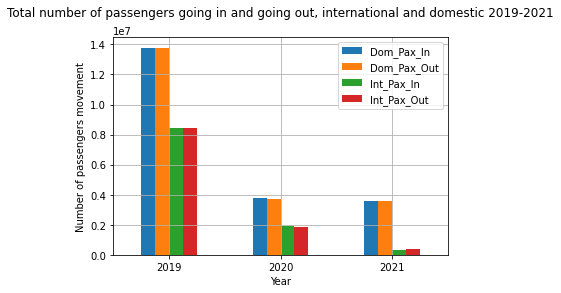

In [39]:
# Bar Chart (FIG 4.1)
passenger = passenger.groupby('Year').sum()
passenger = passenger.rename_axis('Year').reset_index()

passenger.plot.bar(x='Year',y=['Dom_Pax_In', 'Dom_Pax_Out', 'Int_Pax_In', 'Int_Pax_Out'],
        title='Total number of passengers going in and going out, international and domestic 2019-2021\n',
        xlabel='Year', ylabel='Number of passengers movement')
# Rotates X-Axis Ticks by 360-degrees
plt.xticks(rotation=360)
plt.grid()